In [5]:
# UCSD ECE 143 Programming for Data Analysis
# Winter 2023
# Author: m3cheung@ucsd.edu
# Final Project: create mmr by state map

Import modules

In [6]:
import pandas as pd
import plotly.express as px
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

Specify Year for Map

In [7]:
year = 2021.0

Load csv files into Pandas DataFrames

In [8]:
states_death_df = pd.read_csv(\
    "../data_csv/states-total_deaths-includes_lmd.csv").drop(columns=["Notes", "State Code", "Year Code", "Population", "Crude Rate"])
states_births_df = pd.read_csv(\
    "../data_csv/states-total_births.csv").drop(columns=["Notes", "State of Residence Code", "Year Code"])

display(states_death_df)
display(states_births_df)


,State,Year,Deaths
0,Alabama,2018.0,26.0
1,Alabama,2019.0,27.0
2,Alabama,2020.0,30.0
3,Alabama,2021.0,35.0
4,Arizona,2018.0,21.0
...,...,...,...
177,NaN,NaN,NaN
178,NaN,NaN,NaN
179,NaN,NaN,NaN
180,NaN,NaN,NaN


,State of Residence,Year,Births
0,Alabama,2018.0,57761.0
1,Alabama,2019.0,58615.0
2,Alabama,2020.0,57647.0
3,Alabama,2021.0,58054.0
4,Alabama,NaN,232077.0
...,...,...,...
272,NaN,NaN,NaN
273,NaN,NaN,NaN
274,NaN,NaN,NaN
275,NaN,NaN,NaN


Clean up data

In [9]:
# remove NaN rows
states_death_df = states_death_df.dropna()
states_births_df = states_births_df.dropna()

# only work on year 2021
states_death_df = states_death_df[states_death_df["Year"] == year]
states_births_df = states_births_df[states_births_df["Year"] == year]
# drop extra year column
states_death_df = states_death_df.drop(columns=["Year"])

# reset indices to start from 0
states_births_df = states_births_df.reset_index(drop=True)
states_death_df = states_death_df.reset_index(drop=True)
# rename column so that both sets say "State"
states_births_df = states_births_df.rename(columns={"State of Residence":"State"})

# create new df for the ratio!
ratio_df = states_births_df.merge(states_death_df, on="State", how="left")

# consider suppressed rows as 0, since suppressed < 10, just for map
ratio_df["Deaths"] = ratio_df["Deaths"].fillna(0)


display(ratio_df)

,State,Year,Births,Deaths
0,Alabama,2021.0,58054.0,35.0
1,Alaska,2021.0,9367.0,0.0
2,Arizona,2021.0,77916.0,33.0
3,Arkansas,2021.0,35965.0,20.0
4,California,2021.0,420608.0,59.0
5,Colorado,2021.0,62949.0,11.0
6,Connecticut,2021.0,35670.0,0.0
7,Delaware,2021.0,10482.0,0.0
8,District of Columbia,2021.0,8660.0,0.0
9,Florida,2021.0,216260.0,97.0


Calculate MMR for each row

In [10]:
# create column for MMR = (Deaths/Live Births * 100,000)
ratio_df["MMR per 100,000 Live Births"] = round(
    ratio_df["Deaths"] / ratio_df["Births"] * 100000)
# add codes column for map
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}
ratio_df["Code"] = ratio_df["State"].map(code)
display(ratio_df)

,State,Year,Births,Deaths,"MMR per 100,000 Live Births",Code
0,Alabama,2021.0,58054.0,35.0,60.0,AL
1,Alaska,2021.0,9367.0,0.0,0.0,AK
2,Arizona,2021.0,77916.0,33.0,42.0,AZ
3,Arkansas,2021.0,35965.0,20.0,56.0,AR
4,California,2021.0,420608.0,59.0,14.0,CA
5,Colorado,2021.0,62949.0,11.0,17.0,CO
6,Connecticut,2021.0,35670.0,0.0,0.0,CT
7,Delaware,2021.0,10482.0,0.0,0.0,DE
8,District of Columbia,2021.0,8660.0,0.0,0.0,DC
9,Florida,2021.0,216260.0,97.0,45.0,FL


Create Map

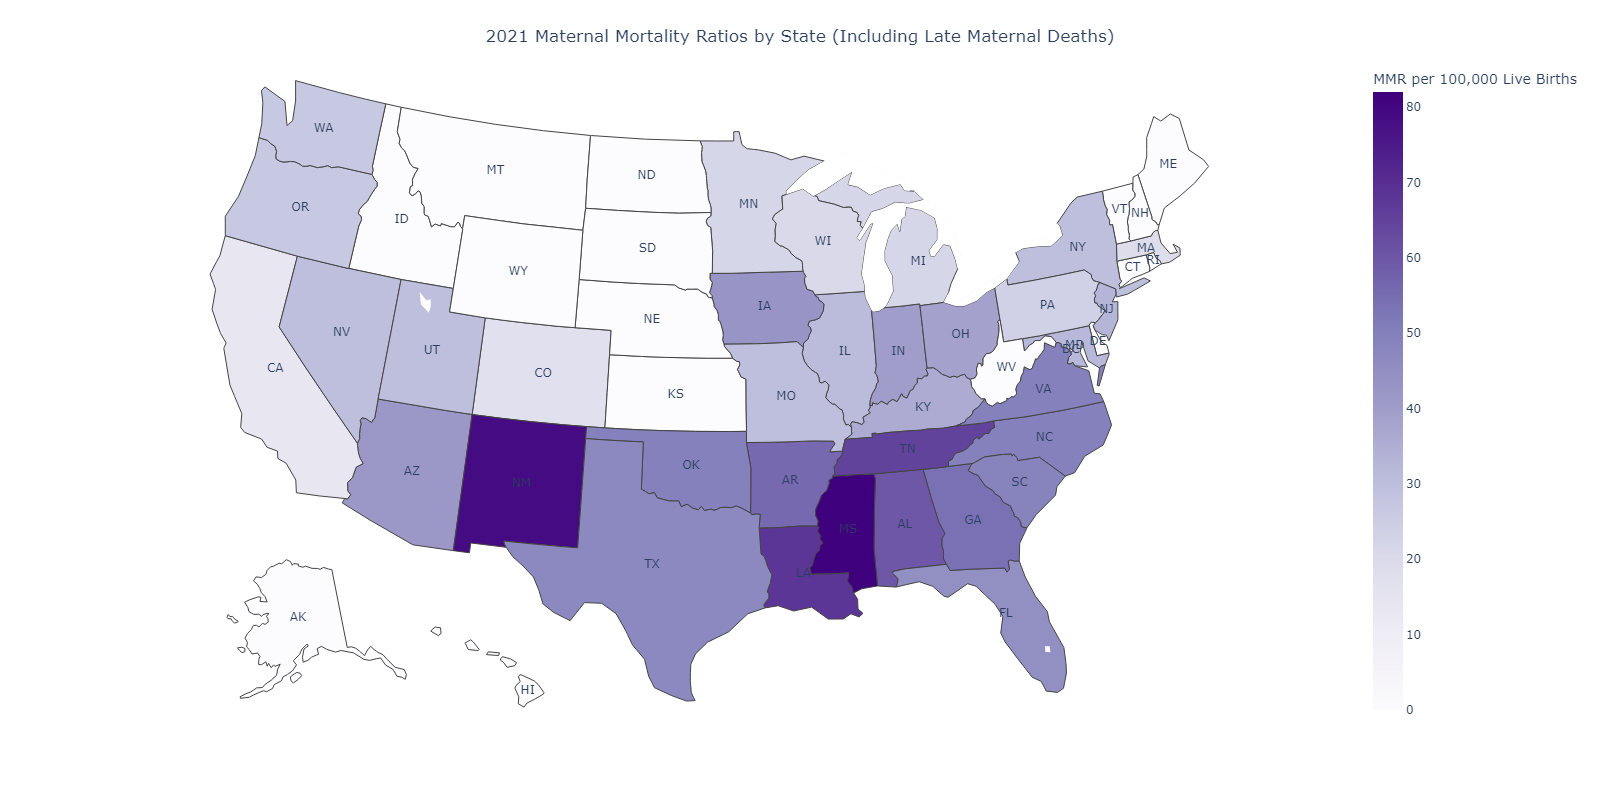

In [12]:
fig = px.choropleth(ratio_df,
                    locations="Code",
                    color="MMR per 100,000 Live Births",
                    color_continuous_scale="purples",
                    locationmode="USA-states",
                    scope="usa")
fig.add_scattergeo(locations=ratio_df["Code"],
                   locationmode='USA-states',
                   text=ratio_df["Code"],
                   mode ='text')
fig.update_layout(title={'text': str(round(year)) +' Maternal Mortality Ratios by State (Including Late Maternal Deaths)',
                  'xanchor': 'center',
                  'yanchor': 'top',
                  'x': 0.5})
fig.show(renderer='png', height=800, width=1600)
